In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
path = '/content/drive/MyDrive/praktikum ml 07'

In [8]:
import pandas as pd

df = pd.read_csv(path +'/data/apples_and_oranges.csv')

df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [11]:
# 1️⃣ Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [16]:
from google.colab import files
uploaded = files.upload()


Saving apples_and_oranges.csv to apples_and_oranges.csv


In [17]:
import pandas as pd

data = pd.read_csv('apples_and_oranges.csv')  # tanpa /content/
print("📊 Data Awal:")
print(data.head())


📊 Data Awal:
   Weight  Size   Class
0      69  4.39  orange
1      69  4.21  orange
2      65  4.09  orange
3      72  5.85   apple
4      67  4.70  orange


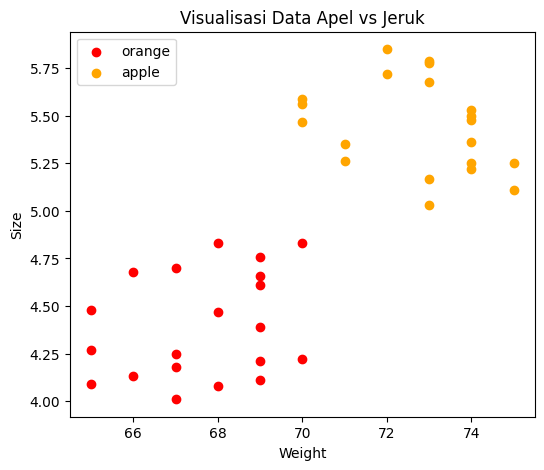

In [18]:
plt.figure(figsize=(6,5))
for label, color in zip(data['Class'].unique(), ['red', 'orange']):
    subset = data[data['Class'] == label]
    plt.scatter(subset['Weight'], subset['Size'], label=label, color=color)

plt.xlabel('Weight')
plt.ylabel('Size')
plt.title('Visualisasi Data Apel vs Jeruk')
plt.legend()
plt.show()


In [19]:
X = data[['Weight', 'Size']]
y = np.where(data['Class'] == 'apple', 0, 1)  # 0 = apple, 1 = orange

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [20]:

y_pred = model.predict(X_test)

print("📋 Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion Matrix:
[[6 0]
 [0 6]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


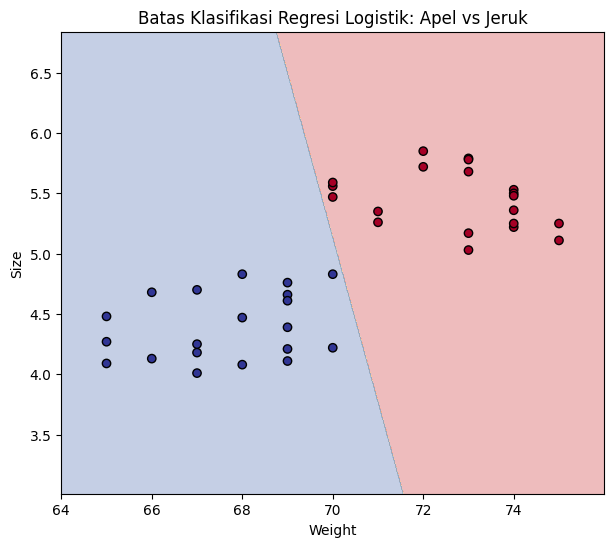

In [21]:

x_min, x_max = X['Weight'].min() - 1, X['Weight'].max() + 1
y_min, y_max = X['Size'].min() - 1, X['Size'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,6kk))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X['Weight'], X['Size'], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
plt.xlabel('Weight')
plt.ylabel('Size')
plt.title('Batas Klasifikasi Regresi Logistik: Apel vs Jeruk')
plt.show()
